# Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# dropping unwanted fetures columns

In [3]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

----
# Statistical Analysis
---

In [4]:
df.shape

(891, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


# Checking for missing Values and Duplicates

In [8]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


# Handling Missing Values

In [9]:
df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


---
# Performing Exploratory Data Analysis
---

# Plotting pie chart for Embarked feature

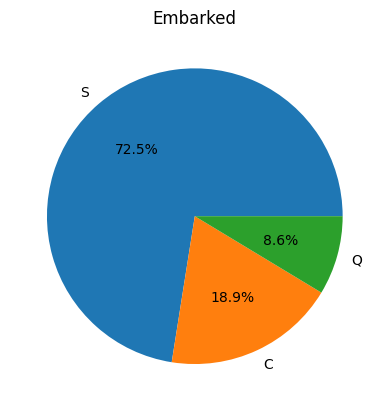

In [12]:
plt.pie(df['Embarked'].value_counts(),labels=df['Embarked'].value_counts().index,autopct='%1.1f%%')
plt.title('Embarked')
plt.show()

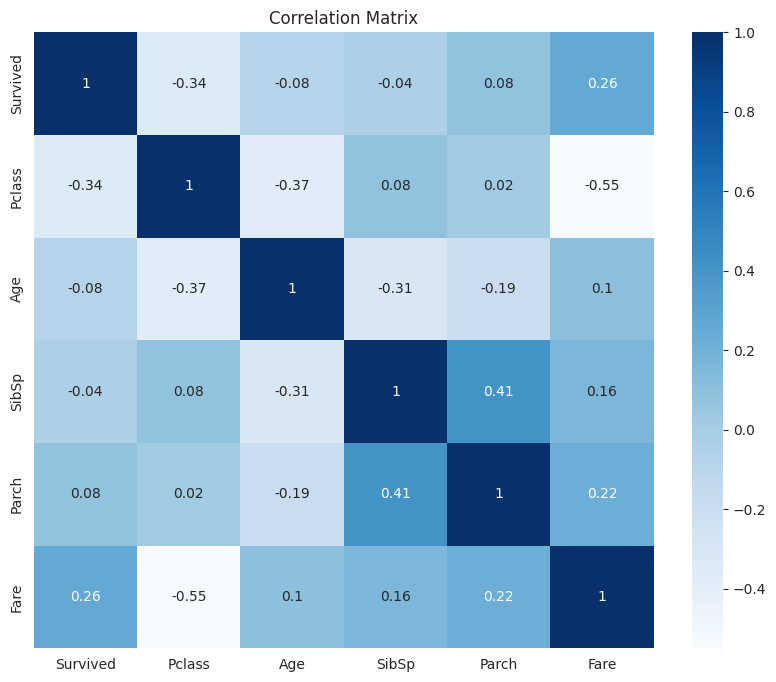

In [13]:
sns.set_style('whitegrid')

corr = df.corr(numeric_only = True).round(2)
plt.figure(figsize = (10,8))
plt.title('Correlation Matrix')
sns.heatmap(data = corr, annot = True, cmap = 'Blues', cbar = True)
plt.show()


In [14]:
corr['Survived'].sort_values(ascending = False)


,Survived
Survived,1.00
Fare,0.26
Parch,0.08
SibSp,-0.04
Age,-0.08
Pclass,-0.34


<Axes: >

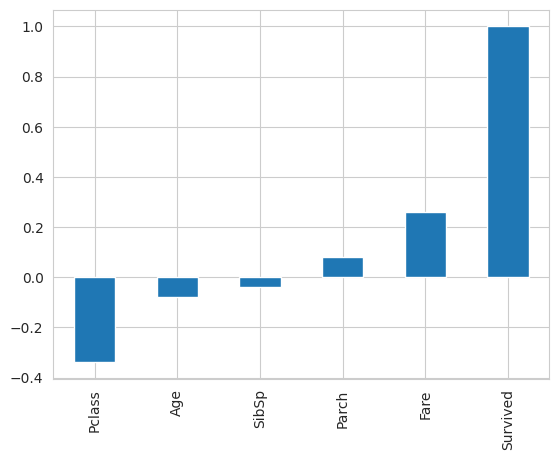

In [15]:
corr['Survived'].sort_values().plot(kind = 'bar')

pclass ig highly negatively Correlated with the dependent variable.

# Visualsizing survival count

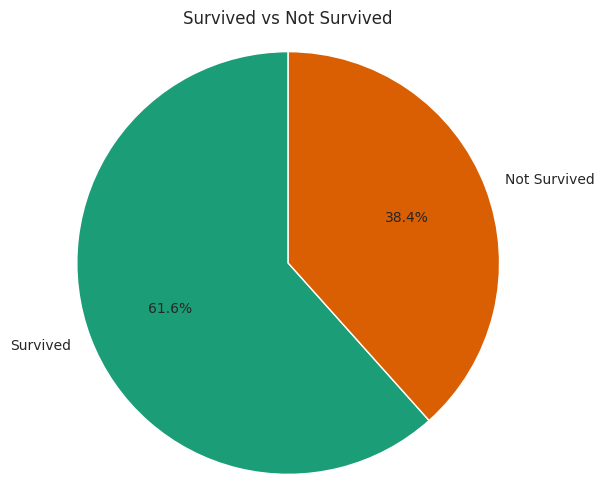

In [16]:
labels = ['Survived', 'Not Survived']
plt.figure(figsize = (6,6))
plt.pie(df['Survived'].value_counts(), labels = labels, colors =plt.cm.Dark2.colors,
           autopct = '%1.1f%%', startangle = 90)
plt.title('Survived vs Not Survived')
plt.axis('equal')
plt.show()

In [17]:
# survival count by gender
Survival_count_gender = df.groupby('Sex')['Survived'].mean()*100
print(Survival_count_gender)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64



 Survival rates showing a higher percentage for females 74.2% compared to males 18.9%.

# Plotting survival count by gender

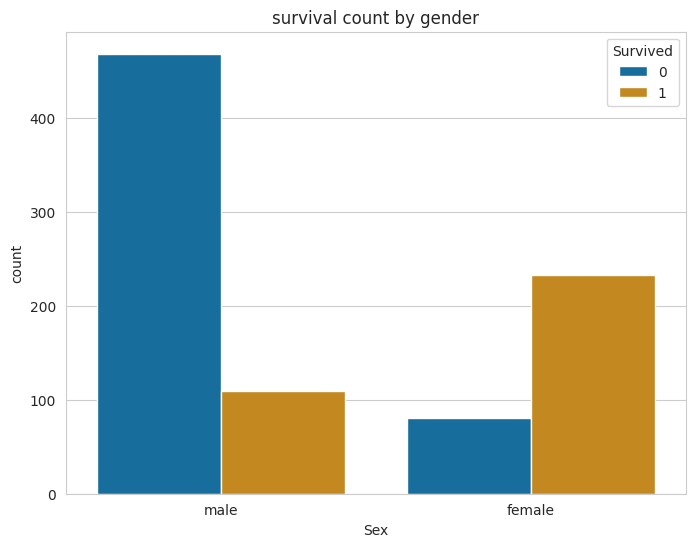

In [18]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Sex', hue = 'Survived', palette = 'colorblind')
plt.title('survival count by gender')
plt.show()

# Survival count by Age

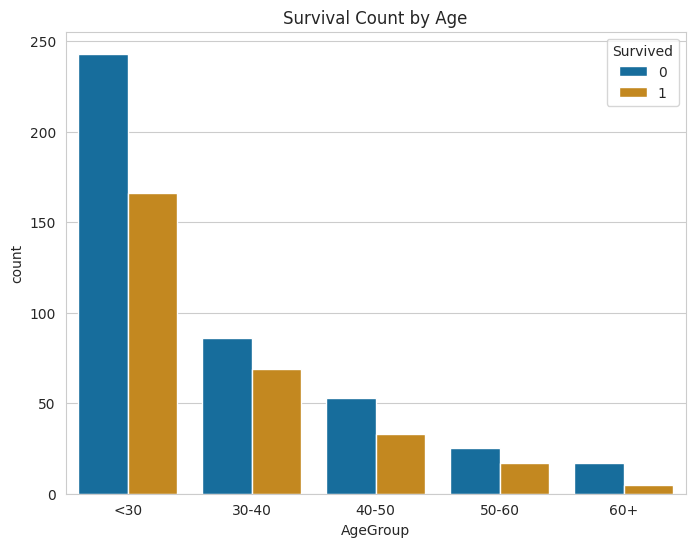

In [19]:

df['AgeGroup'] = pd.cut(df['Age'], bins = [0,30,40,50,60,np.inf], labels = ['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'AgeGroup', hue = 'Survived', palette = 'colorblind')
plt.title('Survival Count by Age')
plt.show()


In [20]:
# Survival Rate by AgeGroup
Survival_rate_AgeGroup = df.groupby('AgeGroup')['Survived'].mean()*100
print(Survival_rate_AgeGroup)

AgeGroup
<30      40.586797
30-40    44.516129
40-50    38.372093
50-60    40.476190
60+      22.727273
Name: Survived, dtype: float64


30-40 has the highest survival rate followed by 50-60 age group

# survivor count by Pclass

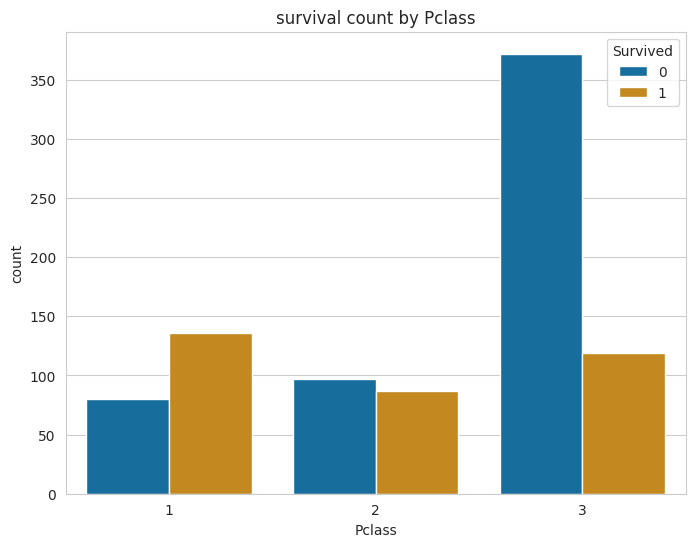

In [21]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Pclass', hue = 'Survived', palette = 'colorblind')
plt.title('survival count by Pclass')
plt.show()

Pclass 1 has highest survival rate then others

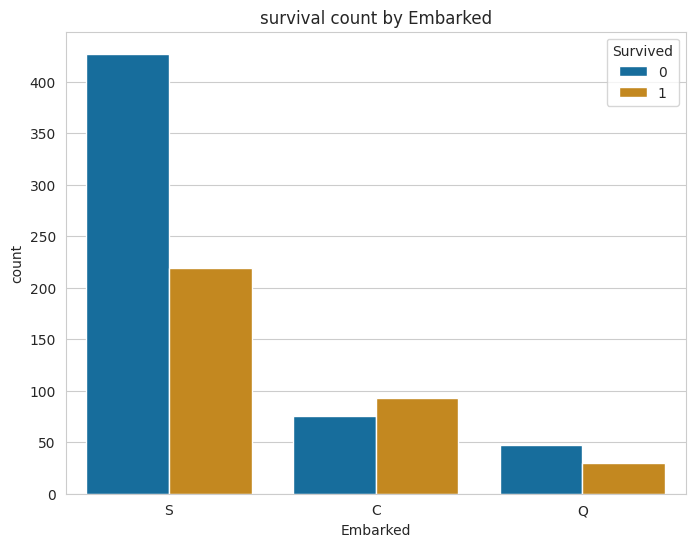

In [22]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Embarked', hue = 'Survived', palette = 'colorblind')
plt.title('survival count by Embarked')
plt.show()

S Embarked has the highest dead and survival rate

# Create histograms for Age, SibSp, Parch and Fare

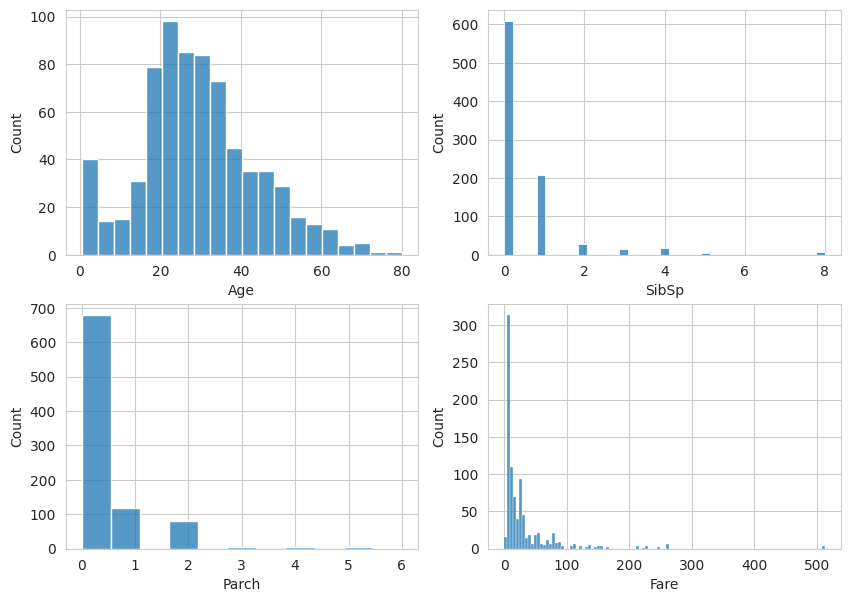

In [23]:
col=['Age','SibSp','Parch','Fare']

plt.figure(figsize=(10,7))
for i,j in enumerate(col):
    plt.subplot(2,2,i+1)
    sns.histplot(df[j])
plt.show()

In [24]:
df.Pclass.value_counts()

,count
Pclass,
3,491
1,216
2,184


In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,<30
1,1,1,female,38.0,1,0,71.2833,C,30-40
2,1,3,female,26.0,0,0,7.9250,S,<30
3,1,1,female,35.0,1,0,53.1000,S,30-40
4,0,3,male,35.0,0,0,8.0500,S,30-40


# plotting box plot to visulaize outliers

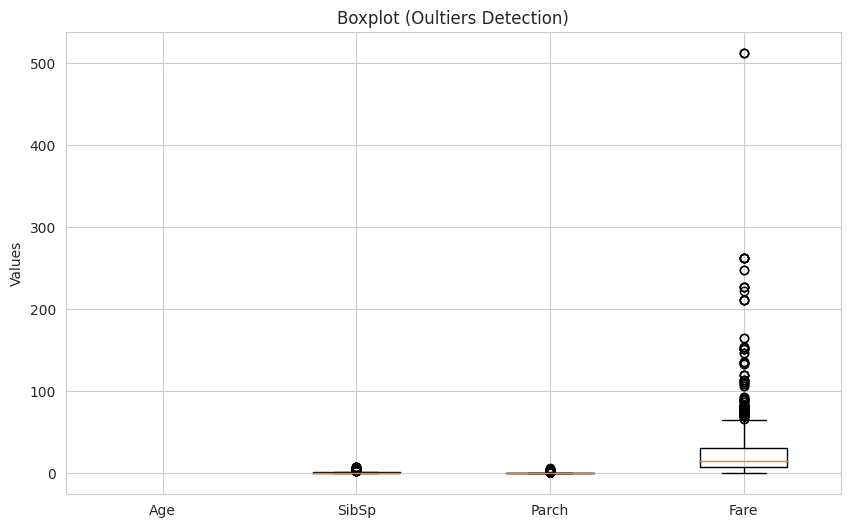

In [26]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['Age'], df['SibSp'], df['Parch'], df['Fare']], labels=['Age', 'SibSp', 'Parch', 'Fare'])
plt.title('Boxplot (Oultiers Detection)')
plt.ylabel('Values')
plt.show()


In [27]:
# Function to remove outliers based on IQR for multiple columns
def remove_outliers_iqr_multiple(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [28]:
# Remove outliers for Age and Fare
df_cleaned = remove_outliers_iqr_multiple(df, ['Age', 'Fare'])


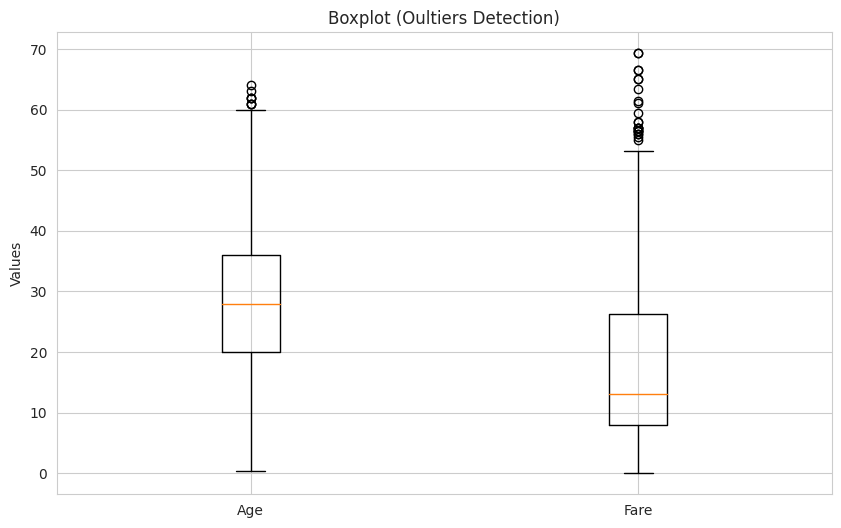

In [29]:
plt.figure(figsize=(10, 6))
plt.boxplot([df_cleaned['Age'], df_cleaned['Fare']], labels=['Age', 'Fare'])
plt.title('Boxplot (Oultiers Detection)')
plt.ylabel('Values')
plt.show()

---
# Data Preprocessing
---

In [30]:
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,<30
2,1,3,female,26.0,0,0,7.9250,S,<30
3,1,1,female,35.0,1,0,53.1000,S,30-40
4,0,3,male,35.0,0,0,8.0500,S,30-40
6,0,1,male,54.0,0,0,51.8625,S,50-60


In [31]:
df_cleaned.drop(['AgeGroup'],axis=1,inplace=True)

# Encoding Categorical Data




Making Dummy Variables by using Onehotencoding

In [32]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Embarked', 'Sex'], drop_first=True)
df_cleaned.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,False,True,True
2,1,3,26.0,0,0,7.9250,False,True,False
3,1,1,35.0,1,0,53.1000,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,True
6,0,1,54.0,0,0,51.8625,False,True,True


In [33]:
X = df_cleaned.drop(columns='Survived')
y = df_cleaned[['Survived']]


In [34]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,22.0,1,0,7.2500,False,True,True
2,3,26.0,0,0,7.9250,False,True,False
3,1,35.0,1,0,53.1000,False,True,False
4,3,35.0,0,0,8.0500,False,True,True
6,1,54.0,0,0,51.8625,False,True,True


# Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

---
# Developing Model
---

#  Initialize models

In [36]:
models_and_params = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['lbfgs', 'liblinear']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'classifier__max_depth': [None, 5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    }),
    'AdaBoost': (AdaBoostClassifier(), {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1, 1]
    }),
    'KNN': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance']
    }),
    'SVC': (SVC(), {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    })
}



# To store results

In [37]:
results = {}

# Train and evaluate each model

In [38]:
for name, (model, param_grid) in models_and_params.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('classifier', model)
    ])

    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model from GridSearch
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'best_params': grid_search.best_params_
    }

In [46]:
for name, metrics in results.items():
    print(f"{name} Accuracy: {metrics['accuracy']:.2f}")
    print("Best Parameters:", metrics.get('best_params', 'Not Available'))
    print("Confusion Matrix:\n", metrics['confusion_matrix'], "\n")


Logistic Regression Accuracy: 0.76
Best Parameters: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Confusion Matrix:
 [[63 12]
 [17 30]] 

Decision Tree Accuracy: 0.81
Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
Confusion Matrix:
 [[66  9]
 [14 33]] 

Random Forest Accuracy: 0.81
Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Confusion Matrix:
 [[66  9]
 [14 33]] 

Gradient Boosting Accuracy: 0.83
Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Confusion Matrix:
 [[66  9]
 [12 35]] 

AdaBoost Accuracy: 0.72
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}
Confusion Matrix:
 [[62 13]
 [21 26]] 

KNN Accuracy: 0.73
Best Parameters: {'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Confusion Matrix:
 [[65 10]
 [23 24]] 

SVC Accuracy: 0.70
Best Parameters: {'classif

# Bar graph for model accuracy

In [39]:
model_names = list(results.keys())
accuracies = [metrics['accuracy'] for metrics in results.values()]

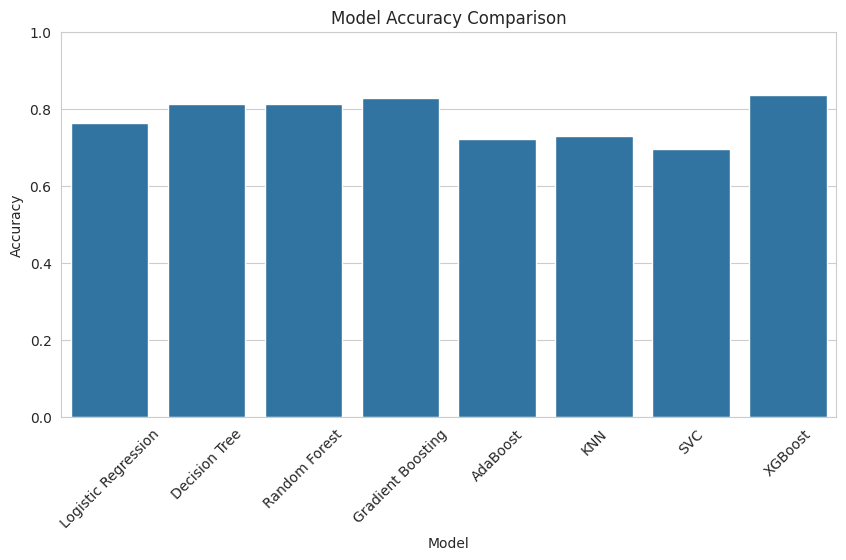

In [40]:
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.xticks(rotation=45)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# identifying and training the best model

In [41]:
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model_params = results[best_model_name]['best_params']
print(f"Best Model: {best_model_name} with parameters: {best_model_params}")


Best Model: XGBoost with parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


In [42]:
best_model_class, _ = models_and_params[best_model_name]
final_pipeline = Pipeline([
    ('classifier', best_model_class.set_params(**best_model_params))
])

final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               classifier__learning_rate=0.2,
                               classifier__max_depth=3,
                               classifier__n_estimators=100,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, ...))])

# Evaluating the best model

In [43]:
y_pred_best = final_pipeline.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

In [44]:
print(f"\nFinal Evaluation for {best_model_name}:")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1 Score: {f1_best:.2f}")


Final Evaluation for XGBoost:
Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81


# Plotting confusion matrix for the best model

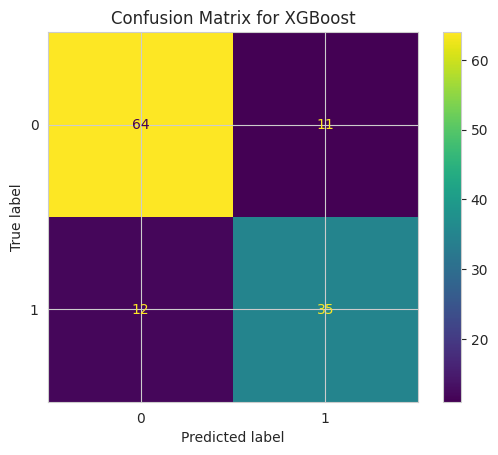

In [45]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best)).plot()
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()

# Create a count plot on predicted values

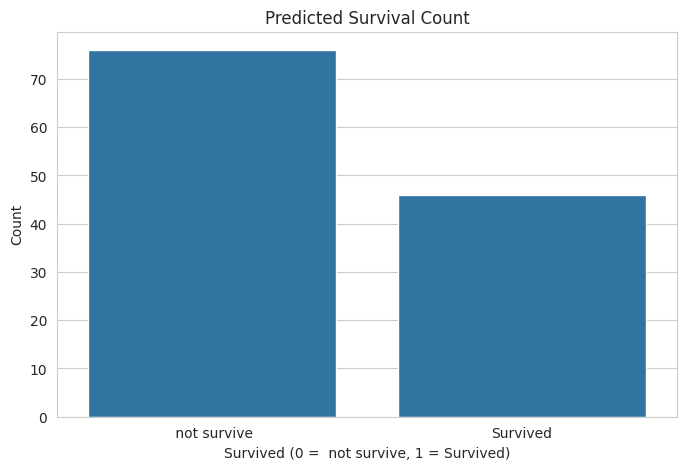

In [51]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_pred_best)
plt.title('Predicted Survival Count')
plt.xlabel('Survived (0 =  not survive, 1 = Survived)')
plt.ylabel('Count')
plt.xticks([0, 1], [' not survive', 'Survived'])
plt.show()

# Model testing

In [53]:
sample_passenger = X_test.iloc[[10]]


survival_prediction = final_pipeline.predict(sample_passenger)


prediction_result = "Survived" if survival_prediction[0] == 1 else "Did not survive"
print(f"The prediction for the selected passenger is: {prediction_result}")


print("Sample Passenger Data:")
print(sample_passenger)


The prediction for the selected passenger is: Did not survive
Sample Passenger Data:
     Pclass   Age  SibSp  Parch  Fare  Embarked_Q  Embarked_S  Sex_male
449       1  52.0      0      0  30.5       False        True      True
